# 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turn folder path into a string 

path = r'C:\Users\carol\Documents\DA\Data Inmersion\04 Python Fundamentals for Data Analysts\Instacart Basket Analysis'

In [3]:
# Import ords_prods_merged.pkl

opc_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customs_merged.pkl'))

In [4]:
opc_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int32  
 1   user_id                object 
 2   order_number           int8   
 3   orders_day_of_week     int8   
 4   order_hour_of_day      int8   
 5   days_since_last_order  float16
 6   product_id             int32  
 7   add_to_cart_order      int8   
 8   reordered              int8   
 9   product_name           object 
 10  aisle_id               int8   
 11  department_id          int8   
 12  prices                 float32
 13  price_range_loc        object 
 14  busiest_days           object 
 15  busiest_period_of_day  object 
 16  loyalty_flag           object 
 17  spending_flag          object 
 18  frequency_flag         object 
 19  first_name             object 
 20  last_name              object 
 21  gender                 object 
 22  state           

In [5]:
opc_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 3. Create a histogram of the “order_hour_of_day” column.

Text(0.5, 1.0, 'Number of Orders by Hour of Day')

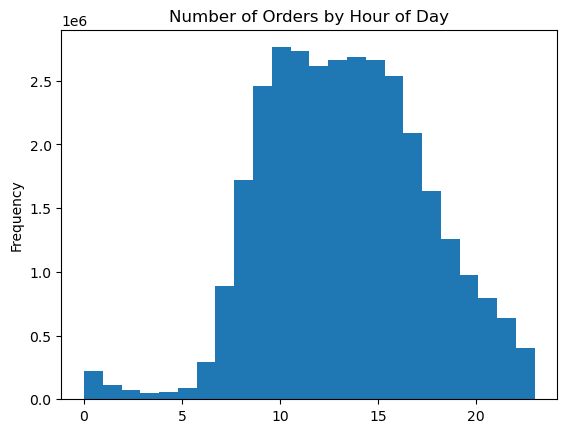

In [6]:
# Create histogram

histogram_hour_of_day = opc_merge['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Number of Orders by Hour of Day')

### Most orders are placed between 10 am and 4pm. After 4pm, the number of orders decreases.

 # 4. Create a bar chart from the “loyalty_flag” column.

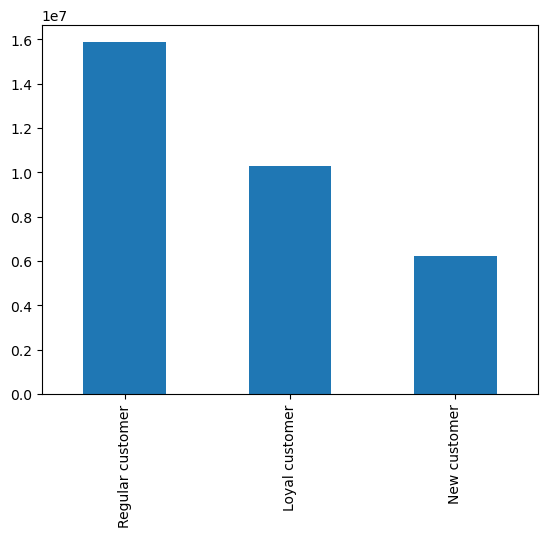

In [7]:
# Create a bar chart

bar_chart_loyalty_flag = opc_merge['loyalty_flag'].value_counts().plot.bar()

### Regular customers make up for most of customers

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

In [8]:
# Create a list holding True/False values to test the np.random.rand() < 0.7

np.random.seed(4)
dev = np.random.rand(len(opc_merge)) <= 0.7

In [9]:
# Store 70% of the sample in the dataframe big

big = opc_merge[dev]

In [10]:
# Store 30% of the sample in the dataframe small

small = opc_merge[~dev]

In [11]:
# Check output

len(opc_merge)

32404859

In [12]:
# Check output

len(big) + len(small)

32404859

In [13]:
# Chose neccesary columns

df_2 = small[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Prices by Hour of Day')

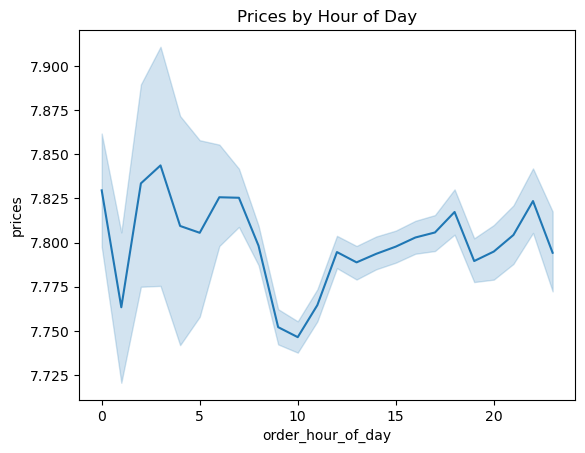

In [14]:
# Create line chart

line_order_hour_of_day = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Prices by Hour of Day')

### There is no apparent relation to the price of items purchased and the hour of which they are purchased

# 6. determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [15]:
# Chose neccesary columns

df_3 = small[['number_of_dependants','age']]

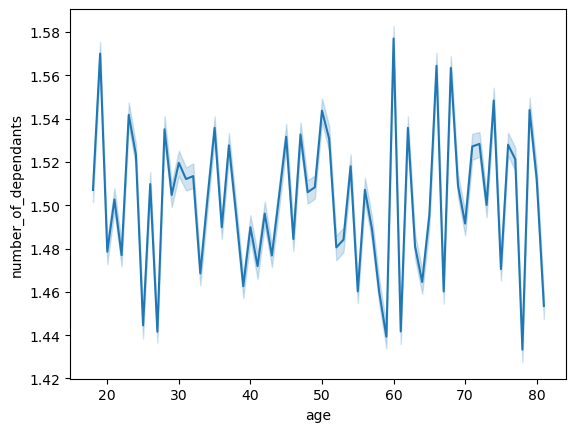

In [16]:
# Create line chart

line_age_ndependents = sns.lineplot(data = df_3, x = 'age',y = 'number_of_dependants')

### There is no connection between age and number of dependents.

# 7.Create a scatterplot using the sns.scatterplot() function.

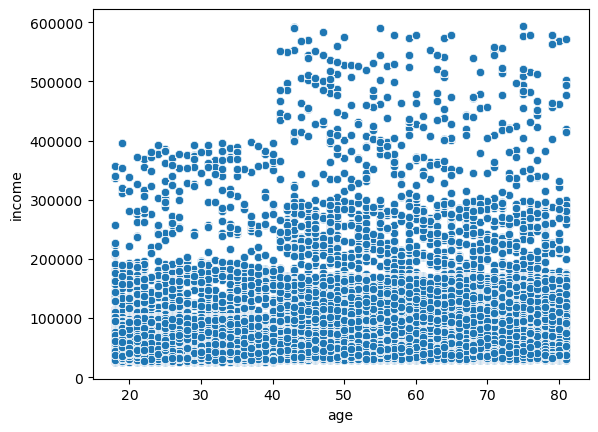

In [17]:
# Create a scatterplot

scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income',data = opc_merge)

### The scatterplot shows that customers over 40 have a higher income that customers 18-39.

# 8. Export your visualizations as “.png” files in your relevant project folder.

In [18]:
# Export 

histogram_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_hour_of_day.png'))

In [19]:
# Export 

bar_chart_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_loyalty_flag.png'))

In [20]:
# Export 

line_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_of_day.png'))

In [21]:
 # Export 

line_age_ndependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_ndependents.png'))

In [22]:
# Export 

scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

Text(0.5, 1.0, 'Number of Orders by Price Range')

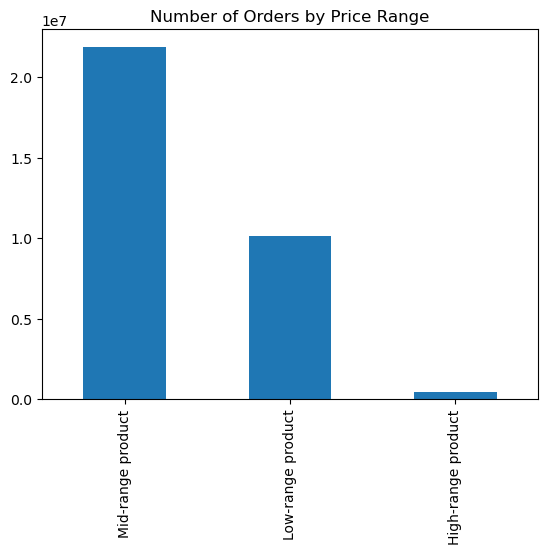

In [23]:
# Create a bar chart

price_range_loc = opc_merge['price_range_loc'].value_counts().plot.bar()
plt.title('Number of Orders by Price Range')

In [24]:
# Export 

price_range_loc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_loc.png'))